# Logistic regression

Вспоминаем пример с пары о домах, которые нам подходят (не подходят). 

In [ ]:
 import numpy as np

X  = np.array([[30, 40], [50, 70]])/10 # разделим для нормализации
# первый столбец значения, которые отражают количество квадратных метров в нашем будущем доме
# второй -  цена жилья
y = np.array([[1],[0]])
# так как мы решаем задачу бинаркой классификации, наши реальные классы закодированны следующим образом 1 - домик подходит, 0 - "ну его!"
print(X) 
print(y)

[[3. 4.]
 [5. 7.]]
[[1]
 [0]]


Построим график 

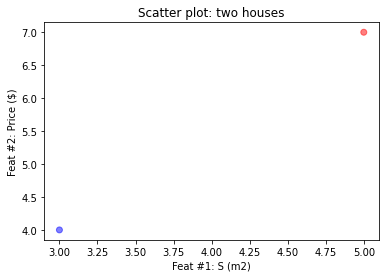

In [ ]:
import matplotlib.pyplot as plt

colors = ['blue', 'red']  #синее - то что нравится, красное - нет
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.5)
plt.title('Scatter plot: two houses')
plt.xlabel('Feat #1: S (m2)')
plt.ylabel('Feat #2: Price ($)')
plt.show()

Теперь когда мы понимаем, как располагаются наши данные, нужно построить функцию, которая для новых домов сможет определять, понравится он нам или нет.

In [ ]:
X_test = np.array([[35,45]])/10 # тестовый дом

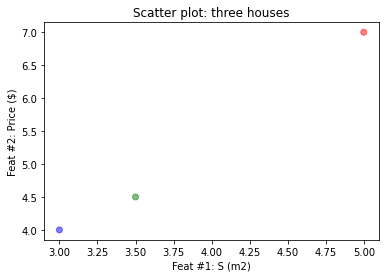

In [ ]:
X_all = np.concatenate((X, X_test), axis = 0 )
colors = ['blue', 'red', 'green']  # синее - то что нравится, красное - нет, зеленое - не ясно
plt.scatter(X_all[:, 0], X_all[:, 1], c=colors, alpha=0.5)
plt.title('Scatter plot: three houses')
plt.xlabel('Feat #1: S (m2)')
plt.ylabel('Feat #2: Price ($)')
plt.show()

Теперь давайте строить перцептрон с одним скрытым слоем. 
Мы хотим получить такую модель, чтобы W1 * Feat_1 + W2 *Feat_2 + b = y и этот y, после того как мы его отнормируем, был близок к 1 для дома который нам нравится и близок к 0  - в противоположном. Значит нам нужно подобрать правильные параметры w1, w2, b.
Зададим их рандомно для начала, при этом w1, w2 "положим" в один вектор для удобства матричного перемножения.

In [ ]:
w = np.random.rand(2,1)*0.01 # 2 - обучаемых весов, 1 - позволяет нам представить массив в виде вектора
b = np.zeros(1) # обойдемся пок без смещения

In [ ]:
w

array([[0.00161233],
       [0.00032565]])

In [ ]:
lin = X.dot(w) + b 
lin

array([[0.00613961],
       [0.01034124]])

Вот наше линейное преобразование. Так веса были очень маленькими, результат уже похож на вероятность, но это не так, - мы еще не применили функцию активации. Будем думать о ней, как о некоторой функции, которая приводит наши значения в интервал от 0 до 1. Так наша сеть однослойная, здесь нам понадобится sigmoid  
![sigm_f](https://wikimedia.org/api/rest_v1/media/math/render/svg/bf2ce67feccc5082cf74bf86a55abf0ddd272e9c)

![sigm](https://habrastorage.org/r/w1560/files/2a4/56f/23e/2a456f23efe54f508677cdcbc5274c7f.png)

In [ ]:
pred = 1/(1+np.exp(-lin)) 
pred

array([[0.5015349 ],
       [0.50258529]])

Теперь об этих цифрах можно думать как о вероятностях, но мы видим  - предсказания не ок. Значит веса нужно как-то менять. 

Но как их менять, если мы еще даже не рассчитали лосс(функцию потерь)?

В качестве лосс функции возьмем то, что мы обсуждали на паре - бинарную кросс энтропию ![alt text](https://i.stack.imgur.com/4xWWU.png)
<br> n  - в этой формуле, количество примеров, на которых мы обучаемся, в нашем случае - 2

In [ ]:
1 * log(0.5015349) + (1 - 0) * log(1 - 0.5015349)

In [ ]:
binCrossEntr = -(np.sum(np.multiply(np.log(pred), y) + np.multiply((1 - y), np.log(1 - pred)))) / X.shape[0]
binCrossEntr

0.6942066264626086

Как раз это значение нам нужно минимизировать. И делается это с помощью градиентного спуска, который позволит нам правильно изменить наши веса. 

Без картинки про горы не обойтись.<br>
![alt text](https://www.ski.ru/kohana/upload/ckfinder_images/u77047/_thumbs/Images/GrandCombinItinerario900x_c.jpg)
<br> Если мы выживем и спустимся вниз, то результат нашей лосс функции будет близок к 0, при этом на наших двух примерах мы естественно практически не обучимся. Но ничего...
<br> Чтобы найти направление, в котором стоит спускаться, нужно найти градиент функции в некоторой точке и взять обратные значения (так как сам градиент показывает в каком направлении функции будет расти быстрее всего).
<br> Градиент от функции нескольких переменных есть вектор, составленный из частных производных по каждой из переменных. Подробнее [здесь](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives)

Так как наша функция сложная и выглядит она примерно так: BinaryCrossEntropy(sigm(W1 * Feat_1 + W2 *Feat_2 + b)) то мы воспользуемся правилом расчета производной сложной функции - Chain Rule

**Задание:** Рассчитайте производную для формулы BinaryCrossEntropy, sigmoid и производные от WX+B по всем переменным (или поверьте мне на слово)

In [ ]:
print(y.shape, pred.shape)

derivat_BCE = (((1-y) / (1-pred)) - y / pred) / X.shape[0]
print(derivat_BCE)

derivat_sigm = pred * (1 - pred)
print(derivat_sigm)

grad_w = X.T.dot(np.multiply(derivat_BCE,derivat_sigm))
print(grad_w)

grad_b = np.sum(np.multiply(derivat_BCE,derivat_sigm))
print(grad_b)

(2, 1) (2, 1)
[[-0.9969396 ]
 [ 1.00519745]]
[[0.24999764]
 [0.24999332]]
[[0.50876556]
 [0.7621183 ]]


In [ ]:
grad_w

array([[0.50876556],
       [0.7621183 ]])

In [ ]:
w

array([[0.00161233],
       [0.00032565]])

Теперь мы знаем градиент для w и b и можем обновить наши веса. Однако просто взять антиградиент недостаточно. Нужно задать еще один параметр learning_rate который позволит нам решать, какой % от градиента мы будем использовать для лучшей сходимости (для лучшего приближения к минимуму функции)

In [ ]:
learning_rate = 0.01
w  = w - learning_rate * grad_w
b = b - learning_rate * grad_b

In [ ]:
w

array([[-0.00347532],
       [-0.00729553]])

In [ ]:
lin = X.dot(w) + b 
pred = 1/(1+np.exp(-lin)) 
binCrossEntr = (- np.sum(np.multiply(np.log(pred), y) + np.multiply((1 - y), np.log(1 - pred)))) / X.shape[0]
binCrossEntr

0.6863289340735668

Лосс стал поменьше, значит мы на верном пути. У нас, кстати, прошла целая эпоха обучения, то есть мы обучились на всех семплах.

In [ ]:
lin = X_test.dot(w) + b 
pred = 1/(1+np.exp(-lin)) 
pred

array([[0.38937129]])

Вот такое предсказание мы получили. Так как наш датасет очень маленький, мы и сами не можем оценить, верно оно или нет.

А теперь давайте возьмем сгенерируем побольше данных и проверим, работает ли наша сеть.

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=21)

Отрисуем, чтобы точно знать, что данные можно разделить

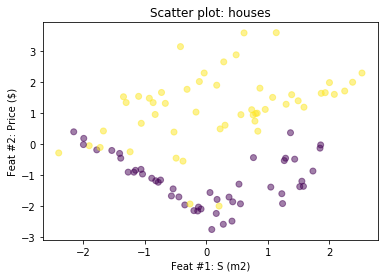

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.title('Scatter plot: houses')
plt.xlabel('Feat #1: S (m2)')
plt.ylabel('Feat #2: Price ($)')
plt.show()

In [ ]:
y = np.expand_dims(y,1)

In [ ]:
learning_rate = 0.2
epochs = 50

w = np.random.rand(2,1) * 0.01
b = np.zeros(1)


losses = []

for n_epoch in range(epochs):
    
    print(f'Epoch: {n_epoch + 1}')

    lin = X.dot(w) + b #переход в одномерное пространство
    
    pred = 1/(1+np.exp(-lin)) #преобразование в "вероятности"
    
    bce = (- np.sum(np.multiply(np.log(pred), y) + np.multiply((1 - y), np.log(1 - pred)))) / X.shape[0] # расчет энтропии с усреднением по количеству семплов

    losses.append(bce) # будем сохранять сюда результаты функции потерь, которые хоти минимизировать
    
    derivat_BCE_sigm = (pred - y) / X.shape[0] # трансформированная производная от BCE и sigm
    grad_w = np.dot(X.T, derivat_BCE_sigm) 
    grad_b = np.sum(derivat_BCE_sigm)
    
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50


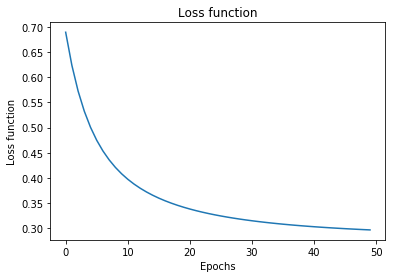

In [ ]:
plt.plot(losses)
plt.title('Loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.show()